## Computer Assignment #3 (Naive Bayes Classification)
### Artificial Intelligence Course - Spring 2021
### Daneshvar Amrollahi (810197685)

#### The questions asked in the description are answered in the format Q_i) where i is the question number.

In [19]:
import pandas as pd 

In [22]:
df = pd.read_csv("books_train.csv")
df.head(5)


,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی


In [25]:
from __future__ import unicode_literals
from hazm import *

normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

In [28]:
normalizer.normalize(df['title'][0])

'ساختار نظریه\u200cهای جامعه\u200cشناسی ایران'

This option seems to be removing semi-spaces (Nim faseleh). We don't need that here since the dataset is already guaranteed to have this standard.

In [31]:
print(stemmer.stem('رفتم'))
print(stemmer.stem('کتاب‌ها'))
print(stemmer.stem('دانشور'))
print(stemmer.stem('خوردن'))
print(stemmer.stem('سلام'))

رف
کتاب
دانشور
خوردن
سلا


### Q1)
I decided not choose this **stemming** option since this library doesn't seem to be accurate enough. It is destructing some normal words.

In [34]:
print(lemmatizer.lemmatize('می‌روی'))
print(lemmatizer.lemmatize('می‌خوری'))
print(lemmatizer.lemmatize('خواهد دید'))
print(lemmatizer.lemmatize('دیدم'))

رفت#رو
خورد#خور
خواهد دید
دید#بین


### Q1)
This option is giving us **Bon-e-Maazi** and **Bon-e-Mozare** of a verb in Farsi. Two verbs having the same **Bon** mostly have the same concept in a sentence so they can be used instead of each other.

In [37]:
word_tokenize(df['title'][1])

['جامعه', 'و', 'فرهنگ', 'کانادا']

This **word_tokenize()** is a good function to use since it breaks a sentence into it's words which we are going to need them later.

In [40]:
df['categories'].value_counts()

رمان                      425
داستان کوتاه              425
جامعه‌شناسی               425
داستان کودک و نوجوانان    425
کلیات اسلام               425
مدیریت و کسب و کار        425
Name: categories, dtype: int64

We have 425 samples of each category.

In [43]:
with open('stop_words.txt') as f:
    ignore = [line.rstrip() for line in f]

ignore = [x.strip() for x in ignore]
ignore[30:50]

['آزادانه',
 'آسان',
 'آسيب پذيرند',
 'آشكارا',
 'آشنايند',
 'آمرانه',
 'آن',
 'آن گاه',
 'آن ها',
 'آنان',
 'آناني',
 'آنجا',
 'آنچنان',
 'آنچنان كه',
 'آنچه',
 'آنرا',
 'آنقدر',
 'آنگاه',
 'آنها',
 'آنهاست']

**ignore**: List of words to ignore in text.

### Q2)

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

$x$: The word appeared

$c$: The book genre

$P(x|c)$ : Probability of seeing word $x$ in a book genre's description of type $c$ **(Likelihood)**

$P(c|x)$ : Probability of the current book genre being $c$ knowing that the word $x$ has appeared in the title. **(Posterior)**

$P(c)$: Probability of seeing a book with genre $c$ which is equal for all genres since they all have occured the same number of times in the dataset. **(Class Prior Probability)**

Since we may have $n$ words in the description/title, $X$ can be represented as $(x_1, x_2, ..., x_n)$

**Bigrams** could also be used to increase accuracy. Here we only consider a word by itself without paying attention to the words before/after it. So we are using **Unigrams** here.

### Q3)
This is en example which bigrams become useful:

شیر سلطان جنگل است.

شیر دستشویی منزل علی خراب است.

In the first sentence, شیر means Lion but in the second example it means faucet. Therefore, these two sentences have completely different concepts and are from different genres.

Using a trigram for the first sentence would be perfect here to match شیر with جنگل which means jungle.


### Q4)

In case that there is word contained only one type of genre, Naive Bayes will definetly choose that genre as the answer which might be wrong in some cases.

When word $x$ hasn't appeared in genre $c$, we have that $P(x|c) = 0$
The reason is that $log(0) = - \infty$ so the sum $ sum_{i=1}^{n} log(P(x_i | c)) $ will converge to $- \infty$ and never will be chosen as the genre since wre choosing the genre which maximizes the sum mentioned above.

**novel_title[x]** is storing number of occurences of word **x** in a **novel**'s title.

Since all the categories have same count, there is no difference in dividing this frequency number by their count.

In [46]:
novel_descr = dict()
sociology_descr = dict()
islamic_descr = dict()
short_story_descr = dict()
kids_descr = dict()
business_descr = dict()

for index, row in df.iterrows():
    tokens = word_tokenize(row['description'])
    for token in tokens:
        word = token
        if (not word in ignore):
            
            cat = row['categories']
            
            if (cat == 'رمان'):
                novel_descr[word] = novel_descr.get(word, 0) + 1
            if (cat == 'جامعه‌شناسی'):
                sociology_descr[word] = sociology_descr.get(word, 0) + 1
            if (cat == 'کلیات اسلام'):
                islamic_descr[word] = islamic_descr.get(word, 0) + 1
            if (cat == 'داستان کوتاه'):
                short_story_descr[word] = short_story_descr.get(word, 0) + 1
            if (cat == 'داستان کودک و نوجوانان'):
                kids_descr[word] = kids_descr.get(word, 0) + 1
            if (cat == 'مدیریت و کسب و کار'):
                business_descr[word] = business_descr.get(word, 0) + 1 





In [49]:
novel_title = dict()
sociology_title = dict()
islamic_title = dict()
short_story_title = dict()
kids_title = dict()
business_title = dict()

for index, row in df.iterrows():
    tokens = word_tokenize(row['title'])
    for token in tokens:
        word = token
        if (not word in ignore):
            
            cat = row['categories']
            
            if (cat == 'رمان'):
                novel_title[word] = novel_title.get(word, 0) + 1
            if (cat == 'جامعه‌شناسی'):
                sociology_title[word] = sociology_title.get(word, 0) + 1
            if (cat == 'کلیات اسلام'):
                islamic_title[word] = islamic_title.get(word, 0) + 1
            if (cat == 'داستان کوتاه'):
                short_story_title[word] = short_story_title.get(word, 0) + 1
            if (cat == 'داستان کودک و نوجوانان'):
                kids_title[word] = kids_title.get(word, 0) + 1
            if (cat == 'مدیریت و کسب و کار'):
                business_title[word] = business_title.get(word, 0) + 1 



Now we plot the frequency of top 6 words used in all genres:

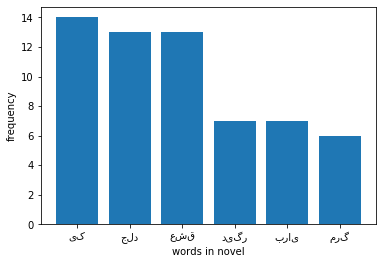

In [52]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(novel_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in novel')
plt.ylabel('frequency')
plt.show()

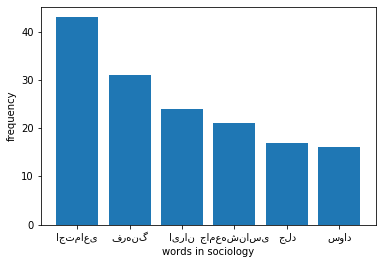

In [55]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(sociology_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in sociology')
plt.ylabel('frequency')
plt.show()

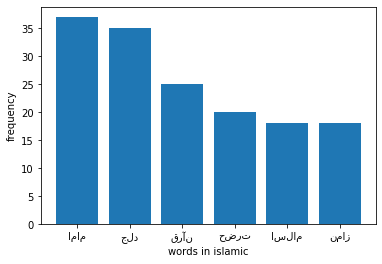

In [58]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(islamic_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in islamic')
plt.ylabel('frequency')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(short_story_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in short_story')
plt.ylabel('frequency')
plt.show()

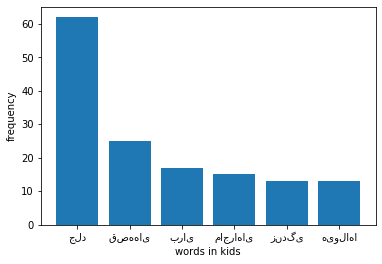

In [42]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(kids_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in kids')
plt.ylabel('frequency')
plt.show()

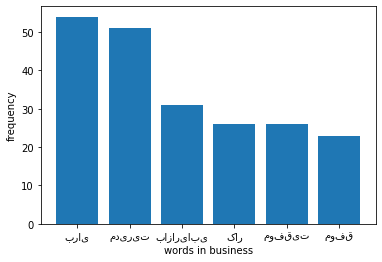

In [45]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(business_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in business')
plt.ylabel('frequency')
plt.show()

In [48]:
tdf = pd.read_csv("books_test.csv")
tdf.head(5)

,title,description,categories
0,کآشوب,«کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...,داستان کوتاه
1,داستان‌های برق‌آسا,«داستان‌های برق‌آسا» نام مجموعه داستان‌هایی به...,داستان کوتاه
2,بحثی درباره مرجعیت و روحانیت,مجموعه مقالات «بحثی درباره مرجعیت و روحانیت» ش...,کلیات اسلام
3,قلعه‌ی حیوانات,«قلعه‌ی حیوانات» جورج اورول، درباره گروهی از ح...,رمان
4,قصه ما مثل شد (۱),«قصه ما مثل شد» یک مجموعه کتاب ۵ جلدی است که د...,داستان کودک و نوجوانان


We map numbers 0 to 5 to our categories

The function below inputs a title $X$ of a book and calculates $P(c|X)$ for each $c \in \{Novel, Sociology, Islamic, Short Story, Kids, Business \}$ where $X$ is the list of words in the title.

In [51]:
from math import log

In [54]:
def calcBelongProbsByTitle(phrase):
    tokens = word_tokenize(phrase)
    ret = [0, 0, 0, 0, 0, 0]

    for word in tokens:

        if (word in ignore):
            continue
            
        if (word in novel_title):
            ret[0] += log(novel_title[word])

        if (word in sociology_title):
            ret[1] += log(sociology_title[word])

        if (word in islamic_title):
            ret[2] += log(islamic_title[word])

        if (word in short_story_title):
            ret[3] += log(short_story_title[word])

        if (word in kids_title):
            ret[4] += log(kids_title[word])

        if (word in business_title):
            ret[5] += log(business_title[word])

    return ret

def calcBelongProbsByDescr(phrase):
    tokens = word_tokenize(phrase)
    ret = [0, 0, 0, 0, 0, 0]

    for word in tokens:

        if (word in ignore):
            continue
            
        if (word in novel_descr):
            ret[0] += log(novel_descr[word])

        if (word in sociology_descr):
            ret[1] += log(sociology_descr[word])

        if (word in islamic_descr):
            ret[2] += log(islamic_descr[word])

        if (word in short_story_descr):
            ret[3] += log(short_story_descr[word])

        if (word in kids_descr):
            ret[4] += log(kids_descr[word])

        if (word in business_descr):
            ret[5] += log(business_descr[word])

    return ret

In [57]:
def getCat(a):
    genres = ['رمان', 'جامعه‌شناسی', 'کلیات اسلام', 'داستان کوتاه', 'داستان کودک و نوجوانان', 'مدیریت و کسب و کار']
    return genres.index(a)

In [ ]:
tdf.head(5)

In [56]:
detections = [0, 0, 0, 0, 0, 0]
correct_detections = [0, 0, 0, 0, 0, 0]
correct = 0

import random
for index, row in tdf.iterrows():

    #p[i]: sigma log ( P(x_i | genre number i) )
    p_title_title = calcBelongProbsByTitle(row['title']) 
    p_title_descr = calcBelongProbsByTitle(row['description'])

    
    p_descr_title = calcBelongProbsByDescr(row['title'])
    p_descr_descr = calcBelongProbsByDescr(row['description'])

    mx_title_title = max(p_title_title)
    mx_title_descr = max(p_title_descr)
    mx_descr_title = max(p_descr_title)
    mx_descr_descr = max(p_descr_descr)

    detect_by_title_title = p_title_title.index(mx_title_title)
    detect_by_title_descr = p_title_descr.index(mx_title_descr)
    detect_by_descr_title = p_descr_title.index(mx_descr_title)
    detect_by_descr_descr = p_descr_descr.index(mx_descr_descr)
    #print(p_title)
    #print()
    
    if (max(mx_title_title, mx_title_descr, mx_descr_title, mx_descr_descr) == mx_title_title):
        detect = detect_by_title_title
    if (max(mx_title_title, mx_title_descr, mx_descr_title, mx_descr_descr) == mx_title_descr):
        detect = detect_by_title_descr
    if (max(mx_title_title, mx_title_descr, mx_descr_title, mx_descr_descr) == mx_descr_title):
        detect = detect_by_descr_title
    if (max(mx_title_title, mx_title_descr, mx_descr_title, mx_descr_descr) == mx_descr_descr):
        detect = detect_by_descr_descr

    detect = detect_by_descr_descr
    #if (mx_title == 0): #no word of title found in dictionaries
    #    detect = detect_by_description
    #else:
    #    detect = detect_by_title


    category = getCat(row['categories'])
    correct += (category == detect)
    
    detections[detect] += 1
    correct_detections[detect] += (detect == category)

        

In [62]:
print(correct)
print("Accuracy is ", correct / len(tdf))

precision = correct_detections[1] / detections[1]
recall = correct_detections[1] / 75
f1 = (2 * precision * recall) / (precision + recall)
print("Precision for class Sociology ", correct_detections[1] / detections[1])
print("Recall for class Sociology ", correct_detections[1] / 75)
print("F1 for class Sociology ", f1)




299
Accuracy is  0.6644444444444444
Precision for class Sociology  0.6875
Recall for class Sociology  0.88
F1 for class Sociology  0.7719298245614036
